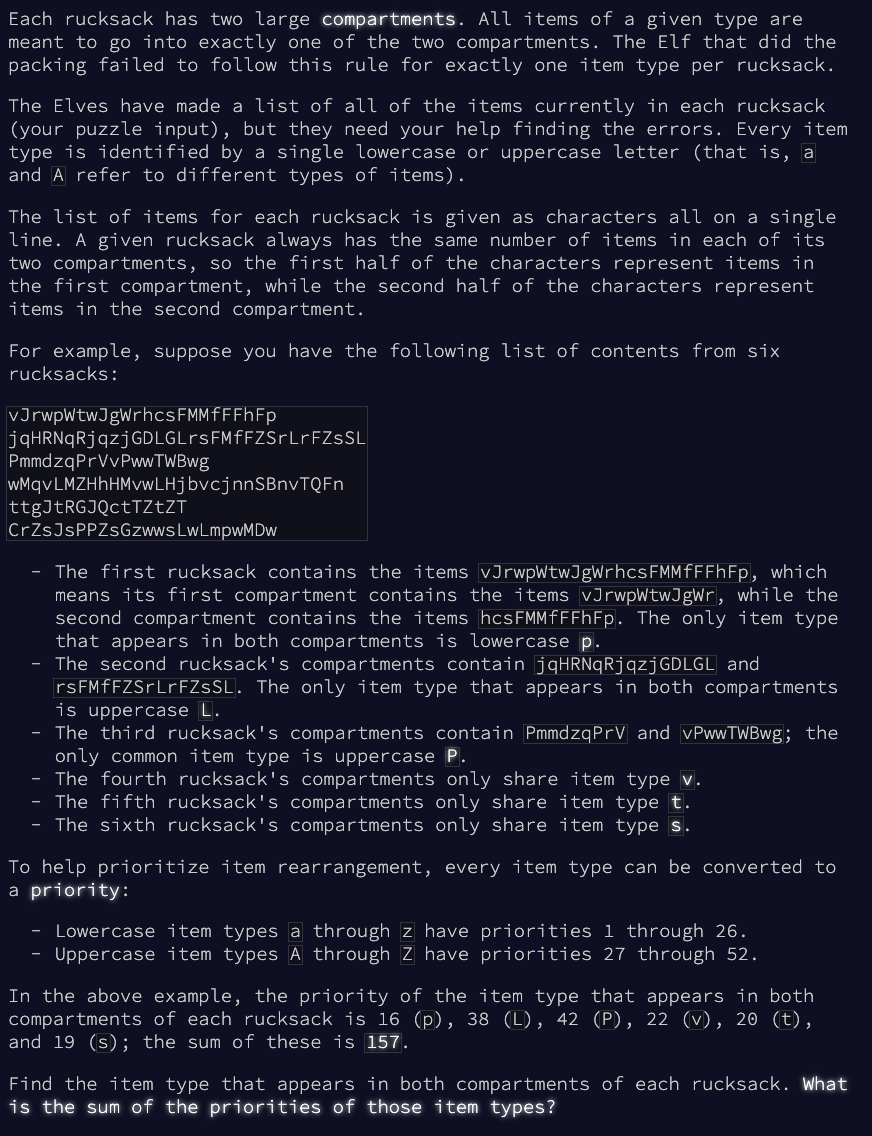

In [1]:
from IPython import display
display.Image("day3part1instructions.jpeg")

In [2]:
with open('day3input.txt') as day3input:
    raw_input = day3input.read()

raw_input[:1000]

'jNNBMTNzvTqhQLhQLMQL\nVCwnVRCGHHJTdsLtrdhrGdsq\nwFJZTbRcnJCbpwpFccZCBfBvPzfpgfgzzWvjSzNP\nwDWgDfWNTvwvgFfWfddGldJVprrrVdNlrN\nnLnmLSnmMVJvSrHqdV\nMsmsbLvtzMjFsCPDsfBwwT\nWTqSCqWSWqSgVZqJHpHmHrhMMVrRhBnn\nPtLGLGddGGMCpprM\njFvLPPlLjvfjjffsclvPqzzJWTbqNSWZsbSTDzCW\nlLSSrfmddlNpnmLdfSPddDdbZQTZgZjbZgjcQZHQPjQgZP\nMJMnhzBJVJwvGsMRhRhTsHTjZjHFctbtHZcgZj\nvzvBWGJMVGwWGGhGqVBnGzVGDfCDmrqNfrrLSdpSfLSpNmNC\nqGWLgfbWhqpLgZbJvTRWJTvMWRslMv\nFQwPwNPCVFQQdNcFHNcwwsvslRDRTMDMsVTGJGtRTs\nwQHnwnQFPNPdjnnPjhphGqBrfpBBBfZf\nmpVpmtPhVtPBLLbQTJpBLZ\nvzFMlMzvvRZMTbJQJQbf\nsrqzvRRqdvzFFrDnvqldFVtwCVCHWNqJHNNcHchCPt\nCQJJLZCJLqNMMDDgGLVV\nRfRFFszTtzbWTFnRtFrRrWvNHghvBVGgMffvmBVDNgGV\nznsjWzstnWjbDnDbTZCpwZcjpjZqQCwSPp\njRrzzrPjLnnpQQDsjj\nCTVnTlZWHTcqZBcTTTHqWscQsQDQQDsmmQfvfhwDmv\nqlWFWWHTZTlqTFWZHtBVFdlTGdNzRnNngbbSrrSNNzPgPGSz\ncWjbcjnssMmRPWbGsWcMbfLBFrZBBLLgZwBrlfLQZtCw\nvqpvFHNvhvJzdZQZtlgNNwlrrw\nJzqVVVVpzhVJqzhSzJhhDVnFjRRMsPnSRcGMRMjWjWmR\nNznNGQgSRQffbbsR\njjjCLwdvLcrhqdblFJsFSPfbDP\nqrrvwHqjtLmSS

In [3]:
rucksacks = raw_input.splitlines()
rucksacks[:10]

['jNNBMTNzvTqhQLhQLMQL',
 'VCwnVRCGHHJTdsLtrdhrGdsq',
 'wFJZTbRcnJCbpwpFccZCBfBvPzfpgfgzzWvjSzNP',
 'wDWgDfWNTvwvgFfWfddGldJVprrrVdNlrN',
 'nLnmLSnmMVJvSrHqdV',
 'MsmsbLvtzMjFsCPDsfBwwT',
 'WTqSCqWSWqSgVZqJHpHmHrhMMVrRhBnn',
 'PtLGLGddGGMCpprM',
 'jFvLPPlLjvfjjffsclvPqzzJWTbqNSWZsbSTDzCW',
 'lLSSrfmddlNpnmLdfSPddDdbZQTZgZjbZgjcQZHQPjQgZP']

In [4]:
compartment_1 = []
compartment_2 = []

for rucksack in rucksacks:
    split = len(rucksack)//2
    compartment_1.append(rucksack[:split])
    compartment_2.append(rucksack[split:])
    
print(compartment_1[0:5])
print(compartment_2[0:5])

['jNNBMTNzvT', 'VCwnVRCGHHJT', 'wFJZTbRcnJCbpwpFccZC', 'wDWgDfWNTvwvgFfWf', 'nLnmLSnmM']
['qhQLhQLMQL', 'dsLtrdhrGdsq', 'BfBvPzfpgfgzzWvjSzNP', 'ddGldJVprrrVdNlrN', 'VJvSrHqdV']


In [5]:
unique_1 = []
unique_2 = []

for items in compartment_1:
    unique_1.append(''.join(list(set(items))))

for items in compartment_2:
    unique_2.append(''.join(list(set(items))))
    
print(unique_1[0:5])
print(unique_2[0:5])

['TzvBNjM', 'TRCVHwGJn', 'bTcFRCwJZpn', 'TfFvDWwNg', 'SmLMn']
['hqLMQ', 'thqdrsLG', 'fvPSWjBNzpg', 'VldrNJpG', 'vSqVrdHJ']


In [6]:
items_in_both = []

for items_in_1, items_in_2 in zip(unique_1,unique_2):
    for item in items_in_1:
        if item in items_in_2:
            items_in_both.append(item)

print(items_in_both)

['M', 'G', 'p', 'N', 'S', 's', 'V', 'G', 's', 'P', 's', 'q', 'W', 'V', 'j', 'p', 'M', 'q', 'L', 'f', 'j', 'j', 'c', 'd', 'f', 'N', 'S', 'Q', 'd', 't', 'S', 'q', 'M', 'L', 'W', 'M', 'D', 'J', 'p', 'Z', 'F', 'j', 'W', 'j', 'R', 's', 'V', 'j', 'j', 's', 'm', 'T', 'B', 'N', 'r', 'z', 'P', 'l', 'v', 'r', 'S', 'N', 'T', 'N', 'W', 'P', 'V', 'c', 'h', 'L', 'C', 'c', 'Q', 'H', 'z', 'Z', 'm', 'W', 'G', 'M', 'F', 'h', 'l', 'N', 'G', 'q', 'l', 'h', 'F', 'V', 'g', 'M', 'p', 'M', 'h', 'q', 'J', 'p', 'L', 'h', 'z', 'p', 'l', 'H', 'h', 'p', 'F', 'Z', 'L', 'm', 'B', 'V', 'q', 't', 'T', 'H', 'N', 'l', 'Q', 'P', 'n', 'C', 'p', 'P', 'p', 'Z', 'H', 'r', 'w', 'V', 'z', 'R', 'n', 'B', 'P', 'w', 'H', 'V', 'P', 'q', 'H', 'B', 't', 'D', 'W', 'N', 'P', 'Q', 'H', 'L', 'D', 'N', 'z', 'f', 'N', 'J', 'C', 'R', 'Z', 'R', 'N', 'v', 'f', 'R', 'C', 'l', 'd', 'C', 'm', 'T', 'j', 'b', 'Q', 't', 'D', 'N', 'W', 'c', 'q', 'Q', 'Z', 'm', 'L', 'B', 'F', 'q', 's', 'R', 'r', 'Q', 'N', 'S', 'D', 'z', 't', 'L', 'M', 't', 'T', 'g',

In [7]:
import string

priority_dict = {}

priorities = []
for i in range(1,53):
    priorities.append(i)
    
for item, priority in zip(string.ascii_letters, priorities):
    priority_dict[item] = priority

print(priority_dict)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, 'A': 27, 'B': 28, 'C': 29, 'D': 30, 'E': 31, 'F': 32, 'G': 33, 'H': 34, 'I': 35, 'J': 36, 'K': 37, 'L': 38, 'M': 39, 'N': 40, 'O': 41, 'P': 42, 'Q': 43, 'R': 44, 'S': 45, 'T': 46, 'U': 47, 'V': 48, 'W': 49, 'X': 50, 'Y': 51, 'Z': 52}


In [8]:
priority_sum = 0

for item in items_in_both:
    priority_sum += priority_dict[item]
    
priority_sum

8493

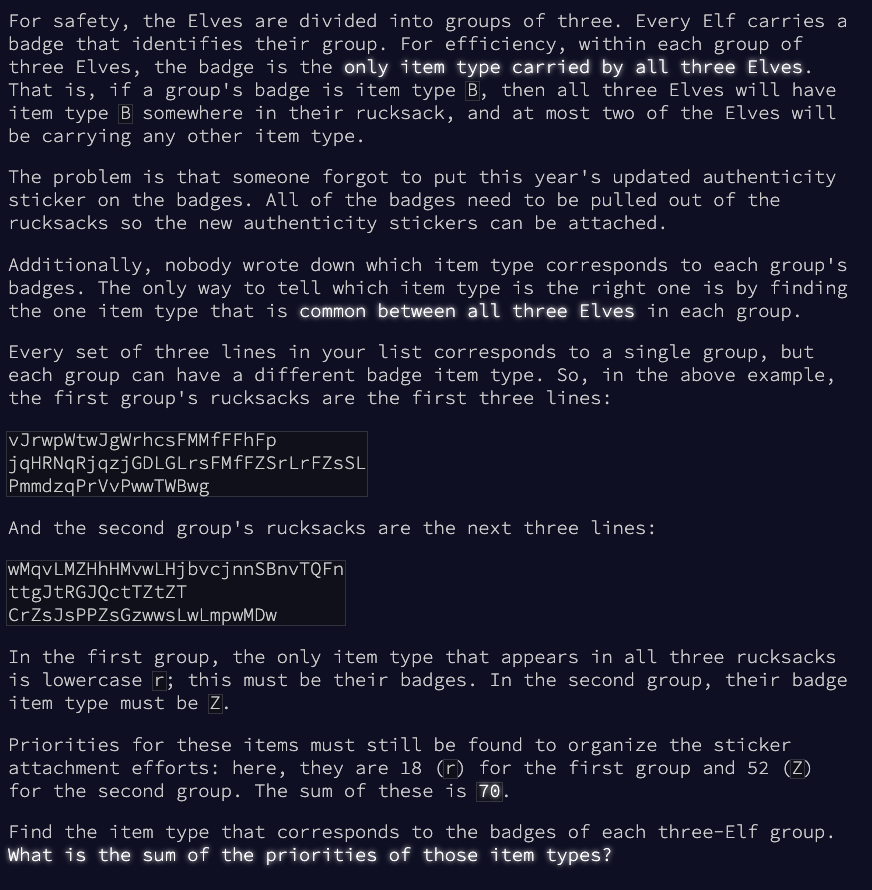

In [9]:
display.Image("day3part2instructions.jpeg")

In [10]:
unique_rucksacks = []

for rucksack in rucksacks:
    unique_rucksacks.append(''.join(list(set(rucksack))))

unique_rucksacks[:10]   

['ThzvqBNjLMQ',
 'TthqRCVdrHwGsJLn',
 'cfNSCgTvPRBwjJnbFWzZp',
 'TfFvDVWdlrwNGJpg',
 'vSqVrmdHJLMn',
 'bTtfFvPCmBwszLMjD',
 'ThSqCVWRrmnHBMJZpg',
 'tPCdrMLpG',
 'cfNSCsLDTvPljJbFqWzZ',
 'cfrNSLDgTpPlmdjnbHZQ']

In [11]:
groups = []

for i in range(0,300,3):
    groups.append(unique_rucksacks[i:i+3])
    
groups[:10]

[['ThzvqBNjLMQ', 'TthqRCVdrHwGsJLn', 'cfNSCgTvPRBwjJnbFWzZp'],
 ['TfFvDVWdlrwNGJpg', 'vSqVrmdHJLMn', 'bTtfFvPCmBwszLMjD'],
 ['ThSqCVWRrmnHBMJZpg', 'tPCdrMLpG', 'cfNSCsLDTvPljJbFqWzZ'],
 ['cfrNSLDgTpPlmdjnbHZQ', 'cGhsMgTtvRBwjJnbFVHzZ', 'frNGhSCMDvdmBwJnqVWzLp'],
 ['bThfZvqRWlGsMJLpg', 'cNGCsMDTtvPRdlwJFVHQ', 'phfFPqdrHwNGjBZQn'],
 ['bTthZPVQmBJLp', 'bTZfFvRlzJMQ', 'crNhCsDtvPRdlwJnFqVWHz'],
 ['ZqCVGNMJLQDg', 'frNGhsMgDTtvRmBnbFVWHz', 'bTptcDqCSWQPwszZjn'],
 ['pPRDQrszLjn', 'cfhCsDTvlmBwnqVWHZQ', 'rNGSgTtPRldBnbFqVWHzZ'],
 ['cfrGCsLMgtPRlmBwjnbFWZQ', 'htFvqQdlrHwNzJZpg', 'cGhSsMDPRmjJnFqVWzp'],
 ['bfSRGNszQng', 'cfrhSCsDvPdlwjJbFqL', 'tvqSrmnHwBjLpg']]

In [12]:
badges = []

for group in groups:
    for item in string.ascii_letters:
        if item in group[0] and item in group[1] and item in group[2]:
            badges.append(item)

badges[:10]

['T', 'v', 'C', 'n', 'G', 'J', 'D', 'n', 'F', 'S']

In [13]:
badges_priority_sum = 0

for item in badges:
    badges_priority_sum += priority_dict[item]
    
badges_priority_sum

2552